<h1 style="color:Violet">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: Violet;">Instructions:</h2>

- Create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: Violet;">Libraries</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_rows', None) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_rows', None) 

<h1 style="color: Violet;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [2]:
df_info = pd.read_csv('asset_information_data.csv')
df_data = pd.read_csv('asset_price_data.csv')

In [3]:
df_data.rename(columns = {
    'date':'date',
    'Asset1': 'fixed_income1',
    'Asset2': 'fixed_income2',
    'Asset3': 'equity1',
    'Asset4': 'equity2',
    'Asset5': 'alternative'
}, inplace=True)

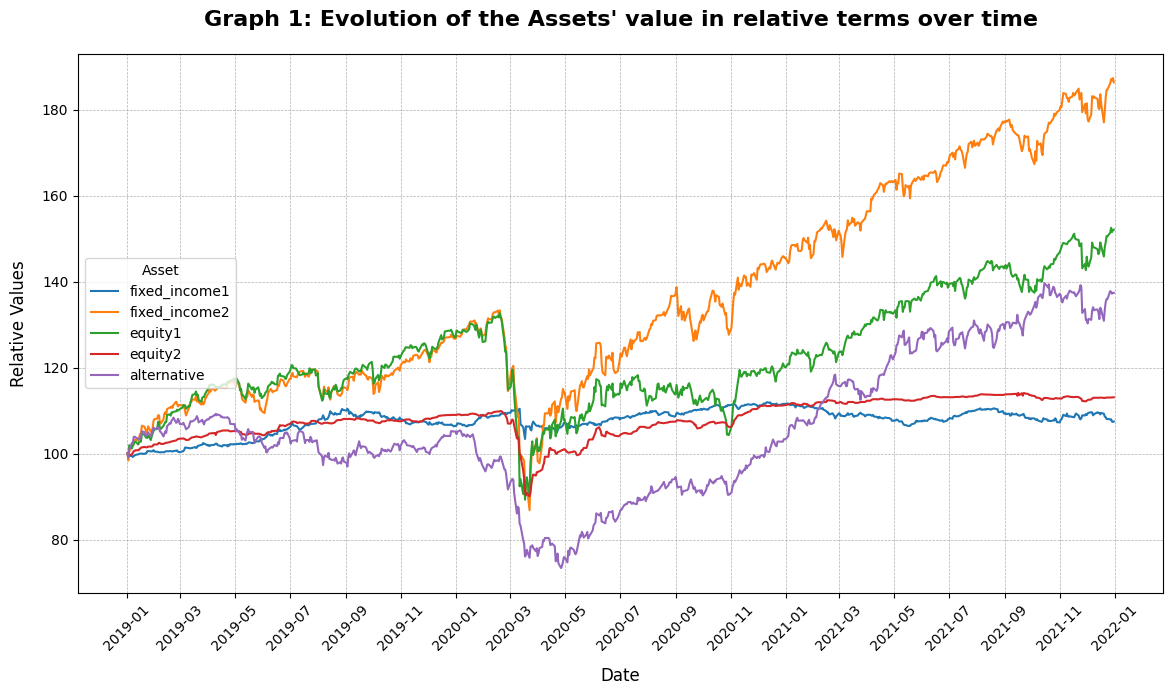

In [4]:
# RELATIVE VALUES - clean the data
df_data1 = df_data.copy()
df_data1.ffill(inplace=True)
relative_values = df_data1.copy()
relative_values["date"] = pd.to_datetime(relative_values["date"])
start = relative_values.iloc[0]
relative_values = relative_values.set_index("date")
relative_values = relative_values/start*100
relative_values = relative_values.drop(columns="date")
relative_values = relative_values.reset_index()
relative_values_final = pd.melt(relative_values, 
                               id_vars = ['date'], value_vars= ['fixed_income1', 'fixed_income2',
                               'equity1', 'equity2', 'alternative'], var_name='Asset', value_name='Value')

# VISUALIZATION
plt.figure(figsize=(14, 7))
sns.lineplot(data=relative_values_final, x='date', y='Value', hue="Asset")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title("Graph 1: Evolution of the Assets' value in relative terms over time", fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Relative Values', fontsize=12, labelpad=10)
plt.legend(title='Asset',loc='center left')
ax = plt.gca()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

<h3 style="background-color: Violet;">Interpretation</h3>

Graph 1 shows the performance trajectories of various assets over time:
- Fixed Income 2 (orange) stands out as the top-performing asset, though its returns are marked by high volatility.
- Equity 1 (green) also demonstrates strong performance but follows a steadier, less volatile path.
- Fixed Income 1 (blue) and Equity 2 (red) exhibit consistent stability throughout the period, with minimal impact from the COVID-19 crisis.
- The Alternative Asset (purple), while highly volatile, ultimately outperforms both Fixed Income 1 and Equity 2 by the end of the period.

This chart highlights each asset’s unique risk-return profile, offering insights into their resilience and responsiveness under varying market conditions.

<h1 style="color: Violet;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

In [6]:
df_returns = df_data1.copy()

In [7]:
df_data1.head(5)

,fixed_income1,fixed_income2,equity1,equity2,alternative
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2019-01-04,230.4026,56.129,26.147133,301.77,51.38
2019-01-07,230.0543,56.838,25.955277,302.33,52.14
2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [8]:
df_return_values = df_returns.pct_change()
df_return_values = df_return_values[1:]*100

In [9]:
df_return_values.head(5)

,fixed_income1,fixed_income2,equity1,equity2,alternative
date,,,,,
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
2019-01-09,0.197561,1.291853,0.227193,0.411970,1.400345


<h2 style="color: Violet;">Correlation Matrix Calculation:</h2>

In [10]:
corr_matrix_P = df_return_values.corr(method='pearson')
corr_matrix_P

,fixed_income1,fixed_income2,equity1,equity2,alternative
fixed_income1,1.000000,-0.088341,-0.061253,0.102252,-0.106484
fixed_income2,-0.088341,1.000000,0.852491,0.526634,0.591399
equity1,-0.061253,0.852491,1.000000,0.511550,0.557414
equity2,0.102252,0.526634,0.511550,1.000000,0.421155
alternative,-0.106484,0.591399,0.557414,0.421155,1.000000


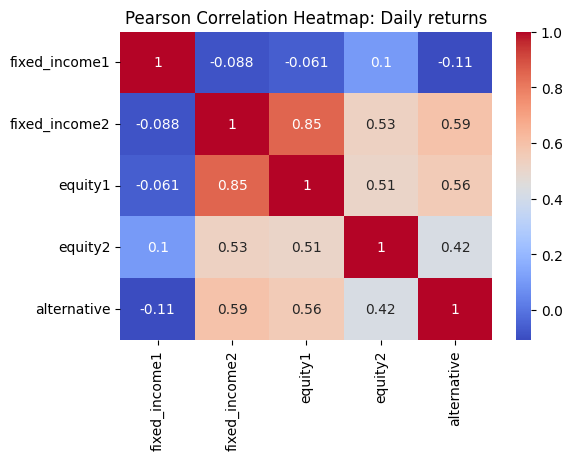

In [11]:
corr_matrix = df_return_values.corr(method='pearson')

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Pearson Correlation Heatmap: Daily returns")
plt.show()

In [12]:
corr_matrix_S = df_return_values.corr(method='spearman')
corr_matrix_S

,fixed_income1,fixed_income2,equity1,equity2,alternative
fixed_income1,1.000000,-0.116576,-0.073791,0.022416,-0.175041
fixed_income2,-0.116576,1.000000,0.769235,0.350084,0.463384
equity1,-0.073791,0.769235,1.000000,0.315971,0.381531
equity2,0.022416,0.350084,0.315971,1.000000,0.243349
alternative,-0.175041,0.463384,0.381531,0.243349,1.000000


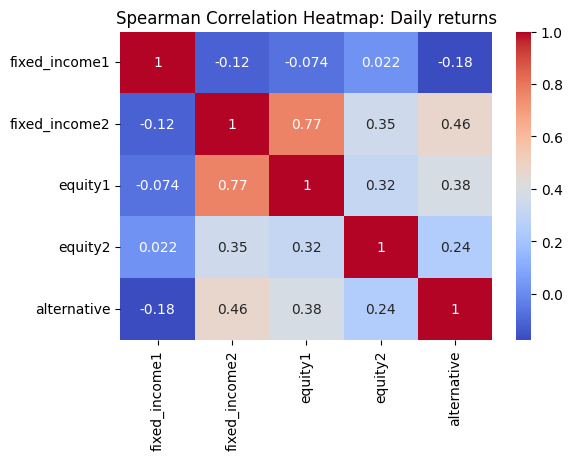

In [13]:
corr_matrix = df_return_values.corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Heatmap: Daily returns")
plt.show()

<h3 style="background-color: Violet;">Interpretation</h3>

- After analyzing both Pearson and Spearman correlations, we find that Equity 1 and Fixed Income 2 are the only assets exhibiting a strong positive correlation according to both methods. Referring back to Graph 1, we observe that these two assets indeed share a similar trajectory, marked by a sharp decline followed by a robust recovery.

<h2 style="color: Violet;">Scatter Plot: Returns of 2 Assets:</h2>

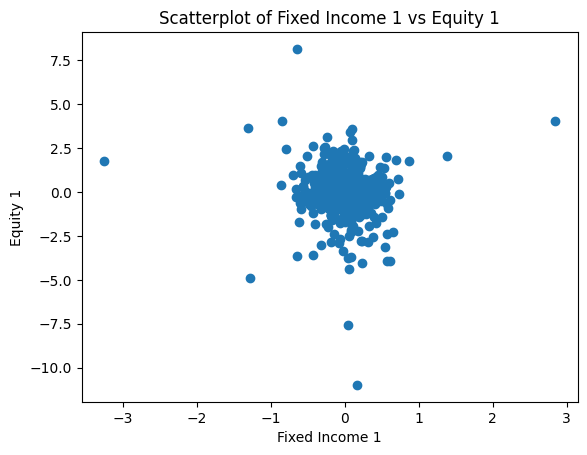

In [15]:
df_subset = df_return_values[['fixed_income1', 'equity1']]

# Plotting
plt.scatter(df_subset['fixed_income1'], df_subset['equity1'])
plt.xlabel('Fixed Income 1')
plt.ylabel('Equity 1')
plt.title('Scatterplot of Fixed Income 1 vs Equity 1')
plt.show()

<h1 style="color: Violet;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: Violet;">Area Chart of Asset Weights</h2>

In [16]:
weight = pd.read_csv('portfolio_weights.csv')

In [17]:
df_weight = weight.copy()

In [18]:
df_weight.rename(columns = {
    'date':'date',
    'Asset1': 'fixed_income1',
    'Asset2': 'fixed_income2',
    'Asset3': 'equity1',
    'Asset4': 'equity2',
    'Asset5': 'alternative'
}, inplace=True)

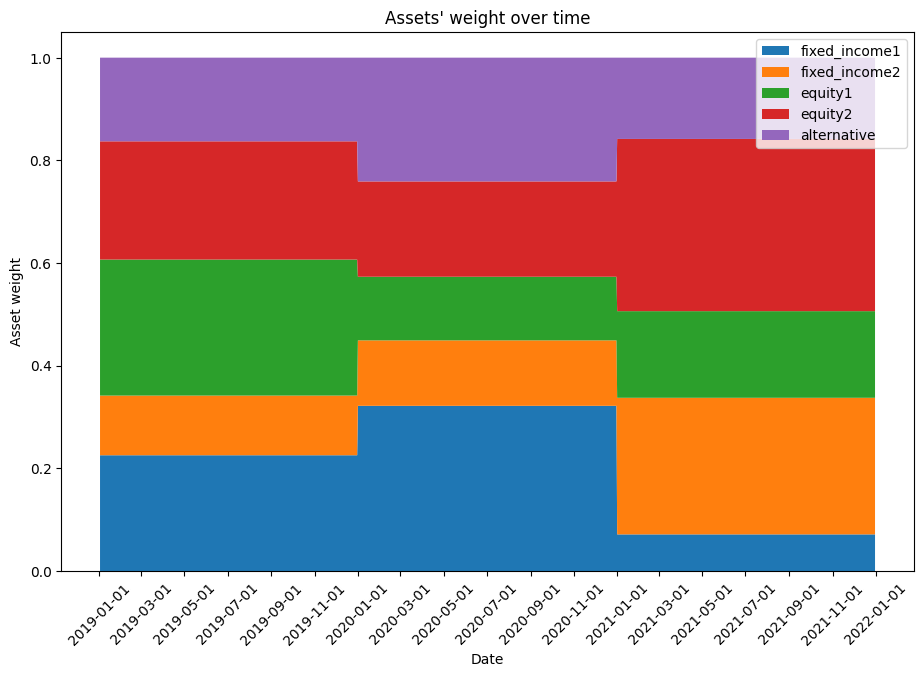

In [19]:
df_weight['date'] = pd.to_datetime(df_weight['date'])
x = df_weight['date']
y = [df_weight["fixed_income1"], df_weight["fixed_income2"], df_weight["equity1"], df_weight["equity2"], df_weight["alternative"]]

# Visualization
plt.figure(figsize=(11,7))
plt.stackplot(x, y, labels=['fixed_income1', 'fixed_income2', 'equity1', 'equity2', 'alternative'])
plt.legend(loc='upper right')
plt.title("Assets' weight over time")
plt.xlabel('Date')
plt.ylabel('Asset weight')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()

<h3 style="background-color: Violet;">Interpretation</h3>
The Area Chart illustrates the shifting weight of various assets over the study period, highlighting how their proportions evolved within the portfolio. Notably, assets less impacted by the COVID-19 pandemic, such as "Fixed Income 1" (in blue), gained weight in the overall allocation. This increase does not necessarily indicate a higher influx of contributions; rather, it could reflect that these assets sustained smaller losses compared to others, maintaining their value more effectively.

Conversely, "Fixed Income 2" (in orange) shows a significant weight decrease within the portfolio in 2020, aligning with its steep decline in Graph 1. However, as the chart reveals, "Fixed Income 2" subsequently rebounds, regaining weight in the portfolio during the period marked by its substantial recovery in Graph 1. This pattern underscores the asset's volatility but also its resilience as it recovered during the observed timeframe.

<h2 style="color: Violet;">Chart of Historical Cumulative Returns of the Portfolio</h2>

In [20]:
df_weight['date'] = pd.to_datetime(df_weight['date'])
df_weight = df_weight.set_index('date')

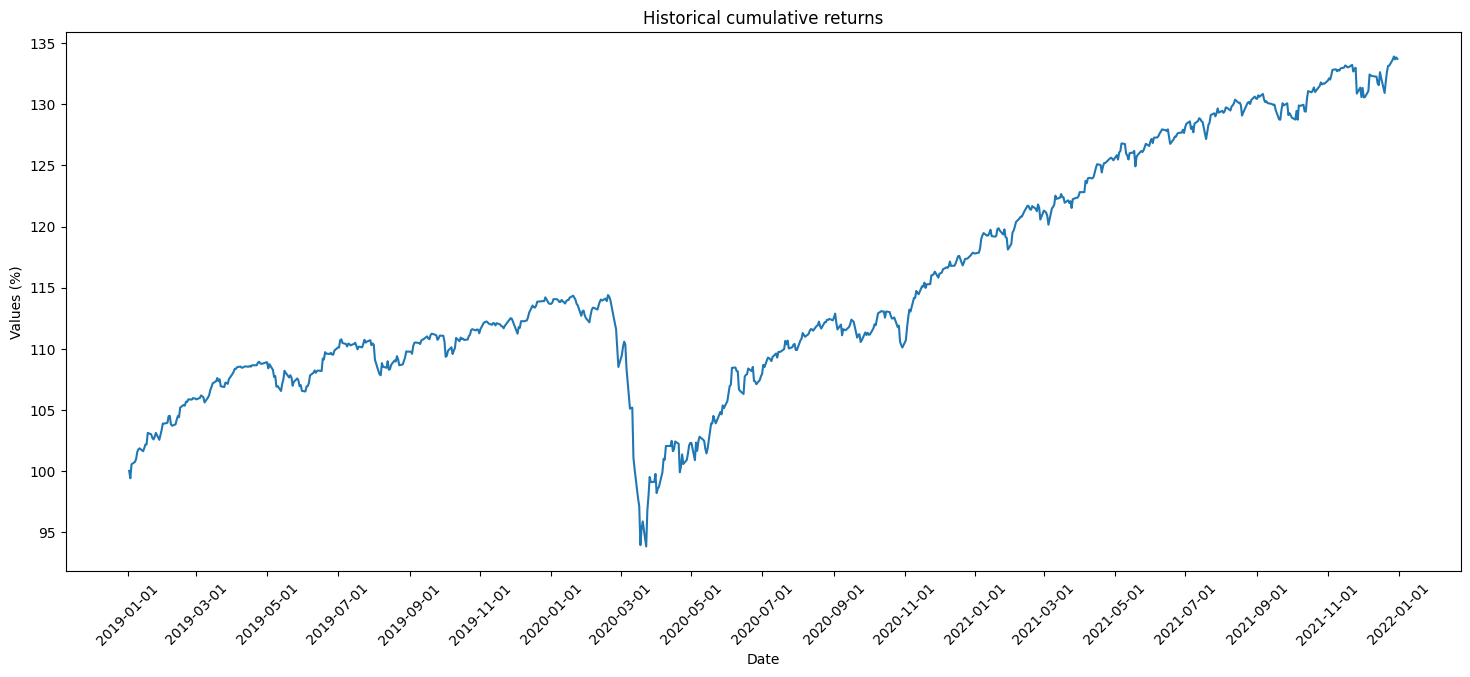

In [21]:
#calculating daily returns adjusted to weight and the cumulative sum
weight_return = (df_weight*df_return_values)
total_ret = weight_return.sum(axis=1) # bc we want to add the rows
total_ret.iloc[0]=100
cumulative = total_ret.cumsum()
cumulative = cumulative.reset_index().rename(columns={0:'Value'})
cumulative['date'] = pd.to_datetime(cumulative['date'])

# Visualization
plt.figure(figsize=(18,7))
sns.lineplot(data=cumulative, x='date', y='Value')
plt.title("Historical cumulative returns")
plt.xlabel('Date')
plt.ylabel('Values (%)')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

<h2 style="color: Violet;">Annualized Return</h2>

<h2 style="color: Violet;">Annualized Volatility</h2>

<h2 style="color: Violet;">Area Chart of Asset Weights Grouped by Family</h2>

In [22]:
df_weight_grouped = weight.copy()

In [23]:
# Grouping by types of asset
df_weight_grouped['Fixed_Income'] = df_weight_grouped['Asset1'] + df_weight_grouped['Asset2']
df_weight_grouped['Equity'] = df_weight_grouped['Asset3'] + df_weight_grouped['Asset4']
df_weight_grouped['Alternative'] = df_weight_grouped['Asset5']

# Dropping individual assets
df_weight_grouped = df_weight_grouped.drop(columns=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'])
df_weight_grouped = df_weight_grouped.reset_index()

# Date column
df_weight_grouped['date'] = pd.to_datetime(df_weight_grouped['date'])

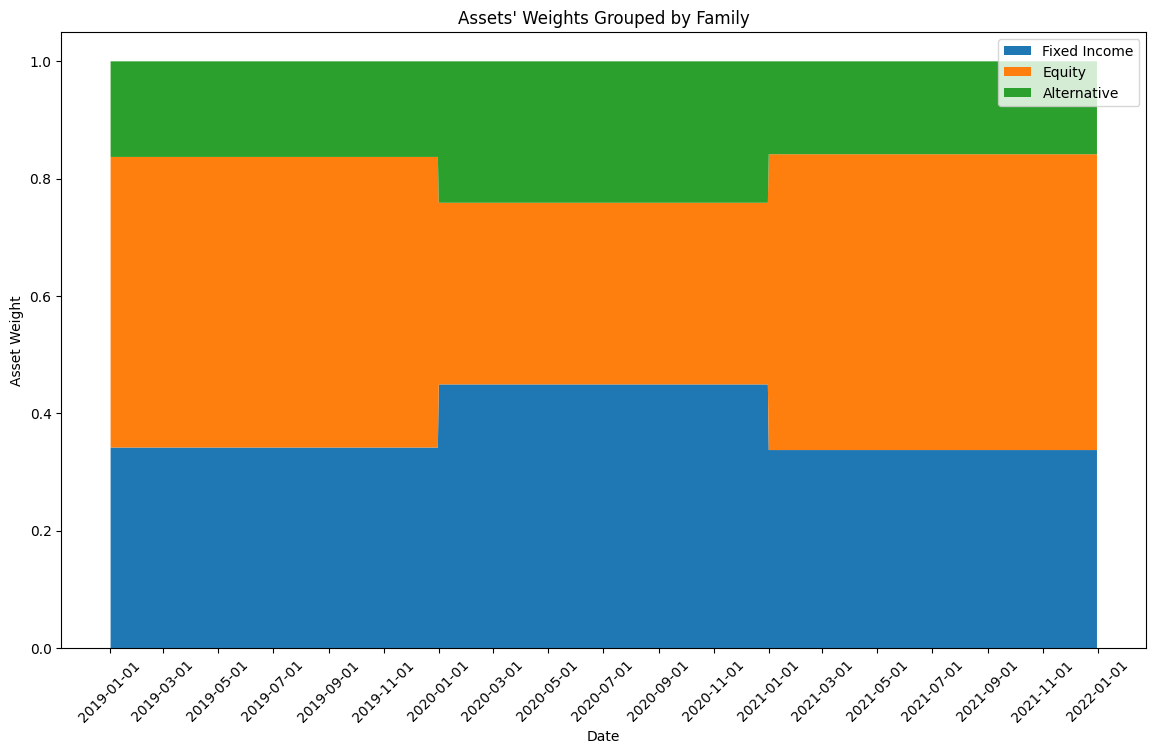

In [24]:
# Plot
x = df_weight_grouped['date']
y = [df_weight_grouped['Fixed_Income'], df_weight_grouped['Equity'], df_weight_grouped['Alternative']]

plt.figure(figsize=(14,8))
plt.stackplot (x, y, labels=['Fixed Income', 'Equity', 'Alternative'])
plt.legend(loc='upper right')

plt.title("Assets' Weights Grouped by Family")
plt.xlabel('Date')
plt.ylabel('Asset Weight')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.show()